# BIA 6304 Text Mining, Fall 2019 - Assignment 1
### by Sara Lienau

*My notebook is rather verbose. However, I organized it with headers and a table of content to make it easier to navigate and zero in on the material of interest to you. The notes are mainly for me to keep track of what I did and why and what I took away from trying different things.*

# Table of Contents

- [Question 1 - Research Question](#Question-1---Research-Question)
- [Question 2 - Creating a Bag of Words](#Question-2---Creating-a-Bag-of-Words)
- [Question 3 - Results and Next Steps](#Question-3---Results-and-Next-Steps)

- [Task 1 - Create DataFrame of Text Scrapped from Website](#Task-1A---Create-a-Data-Frame-Containing-Text-from-a-Website)
- [Task 2 - Experiment with Vectorizers](#Task-2---Apply-a-Count-Vectorizer-&-Create-a-Bag-of-Words)
  - [Variation 1 - Default - Feature Exists](#Variation-1---Default---Feature-Exists)
    - [Variation 1.A - Default - Feature Frequency](#Variation-1-A---Default---Feature-Frequency)
  - [Variation 2 - Preserve Original Case](#Variation-2---Preserve-Original-Case)
  - [Variation 3 - Adjust RegEx to Preserve Hyphenated Words](#Variation-3---Adjust-RegEx-to-Preserve-Hyphenated-Words)
  - [Variation 4 - Exclude Stop Words](#Variation-4---Exclude-Stop-Words)
  - [Variation 5 - Prevalent Terms](#Variation-5---Prevalent-Terms)

# Question 1 - Research Question
*Note:  I am a full-time student. But I will imagine I am back at my previous job. My motivation for the project is to understand how different industries and companies are using AI (or data analytics). It will help me determine where I might want to pursue employment after I complete the MS-BIA degree.*
 
My boss and I are curious about how AI is being used at other companies. I will use the [WSJ Pro Artificial Intelligence](https://www.wsj.com/pro/artificial-intelligence/newsletters) daily newsletter to do a literature review. I want to use the articles to look at the applications of AI, its business value, company/industry, and whether the outcome was favorable or not. The WSJ is not the be all end all, but one viewpoint and the newsletter’s focus is a good starting point. (The newsletter targets “those who want to better understand how artificial intelligence is transforming the business landscape, and more importantly how to apply AI to strategic and operational decisions.”)
 
Some additional data I need is a way to map companies mentioned in the articles to their respective industry. I am not sure the precision by which I will be able to assess the business value of the application of AI. I will probably need a way to estimate something like “t-shirt size” (i.e., small, medium, large, extra-large). I will also have to work through a taxonomy of the uses of AI. I need to dig into the content of the articles to figure that out. The newsletter has titles for some articles and section headings for topics (e.g., robotics, facial recognition, operations, health care) so that is a starting point for categorization.

# Question 2 - Creating a Bag of Words
My corpus is a collection of titles of articles in the WSJ Pro AI Newsletter from Jan to Aug 2019 (about 8 months).  It contains 474 documents (the title of an article). In Task 2, I experimented with various methods to tokenize the documents into words or phrases.  And then identify the existence or count the frequency of the tokens.  This process of turning text into a number is called vectorization.
 
My documents are very short.  An article title typically contains 3 to 6 words with a maximum of 10.  As you might expect, there are not many words repeated within a title, so I focused on the existence of a token in the document rather than counting its frequency.  I first concentrated on whether the resulting tokens are a good representation of the terms in the article titles.  Through various adjustments, I bounced between 1000-1100 features.  And at the end, I zeroed in on the most popular terms (1 or 2-word phrases contained in at least 1% of the documents or five titles), and that reduced the feature space dramatically to 42 terms (versus 1000).  
 
Summary of Variations:
- Most of the words of the titles are capitalized, so converting text to lower case did not reduce the feature space much.  (There were not many variations of capitalized and lower-case words to consolidate.) 
- I adjusted the token regular expression to include hyphenated words and abbreviations.  Without this change, the tokenization process was either ignoring useful features such as U.S. or U.K. or decomposing one logical word into multiple features (e.g., Ex-Google into ex and google or Open-Source as open and source).  The hyphenated term is more meaningful.
- I used a custom stop word list.  I left the document text in its original case (most words capitalized the first letter), and not all stop words in the titles are lower-case.  I think there is more work to do on the stop words.  In my final feature space, some of the stop words appear to be useful terms (Bill, Fire).  And there are other terms I should exclude (e.g., Push, Use/Uses/Using) since they do not add to the understanding of where AI is being used.

# Question 3 - Results and Next Steps
I am quite pleased with the results of analyzing the titles of articles in the newsletters.  I was able to adjust parameters of the vectorization process to generate a useful feature space – keywords for the most prevalent topics (about 40) to a complete list of terms (around 1000).  I found it interesting to take a term and look up the related article titles and then sometimes dive into the newsletter article.  I can imagine creating a word cloud and being able to click on a word and see a list of the related article title(s) and then drilling through to the article.  My boss and I could spend hours engrossed in exploring the articles in this manner.  And that would spur us to want to take the next step and do more analysis of the text within the articles in a more automated fashion.
 
My boss is pleased with the progress to date and encouraged me to keep going.  To do a more worthwhile analysis of the actual articles will probably require additional text mining techniques beyond count vectorization.  That is, identify the companies involved, how AI is being applied, and whether the effort is successful or not.  I would propose some exploratory analysis to get my arms around the type of content in the articles.  And then we would identify a couple of things we feel would be valuable to glean from the articles. And we would determine the practicality of biting off that portion of the text mining project.

# Setup for Tasks

In [1]:
# import module(s) into namespace
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import datetime

from sklearn.feature_extraction.text import CountVectorizer
import math

#from sklearn.feature_extraction.text import TfidfVectorizer

pd.set_option('display.max_colwidth', 1000) #important for getting all the text

### Documentation
- [Count Vectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
- [TfidVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

# Task 1A - Create a Data Frame Containing Text from a Website

On **Thursday, August 29, 2019**, I captured the contents of **the 
[WSJ PRO Artificial Intelligence Newsletter](https://www.wsj.com/pro/artificial-intelligence/newsletters) 
index page** and saved it to a local HTML file.  This index page listed the date and subject of available newsletters along with a link to the contents of each newsletter.  A newsletter usually contains 4-6 short articles or summary of a full article on the WSJ or other news/academic website.  The newsletters are typically delivered as an email but archives are still available on the WSJ's website.

I "scraped" the title of articles from the subject line of the newsletter. The subject line usually contained the titles of three articles in the newsletter.

**My corpus is the set of article titles in the subject line of the WSJ PRO Articial Intelligence daily newsletter from Jan 10 to Aug 29, 2019**. There are a total of **474 documents (article titles)** from 160 newsletters across nearly 8 months.

For a future assignment, I hope to use the newsletter links I captured to retrieve and scrap the contents of each newsletter and have a richer set of text to analyze (4-6 short or summary articles from each newsletter).

In [2]:
# -------------------------------------------------------------------------
# read local copy of the target .html page into a variable 
# (instead of fetching the page from its source website)
# -------------------------------------------------------------------------
page_text = ""

f = open("WSJ_Pro_AI_Newletters_20190829.html", "r")
page_text = f.read()
f.close()

# a sample of the text in the .html file
print(page_text[:1500])


<html lang="en"><head><script type="text/javascript" src="https://cdn.krxd.net/userdata/get?pub=fd886588-e5a4-4fe2-9d09-006f6d3c3aab&amp;callback=Krux.ns.dowjones.kxjsonp_userdata"></script><script type="text/javascript" src="https://consumer.krxd.net/consent/get/fd886588-e5a4-4fe2-9d09-006f6d3c3aab?idt=device&amp;dt=kxcookie&amp;callback=Krux.ns.dowjones.kxjsonp_consent_get_0"></script><script type="text/javascript" src="https://beacon.krxd.net/optout_check?callback=Krux.ns.dowjones.kxjsonp_optOutCheck"></script><script type="text/javascript" async="" src="https://scdn.cxense.com/cx.js"></script>
      <meta charset="utf-8">
      <style>.WSJProTheme--fontSmoothing--3midT9i1{-webkit-font-smoothing:antialiased;-moz-osx-font-smoothing:grayscale}.WSJProTheme--grayBackground--27-wtIVs{background-color:#f1f0ee}.WSJProTheme--cyber-research--uVjg019B{border-top:2px solid #c7b78f}.WSJProTheme--cyber-research--uVjg019B.WSJProTheme--even--3qyDUt2S{background-color:#192f35}.WSJProTheme--cyber-r

In [3]:
# -------------------------------------------------------------------------
# Scrapping Part 1 - extract info about each newsletter from the webpage
# -------------------------------------------------------------------------

# date info extracted 8/29/2019
extracted_date_value = datetime.date(2019,8,29)

# lists to hold data as extracted
extract_date       = []
newsletter_date    = []
newsletter_subject = []
newsletter_link    = []
title1 = []
title2 = []
title3 = []

# parse webpage with BeautifulSoup
soup = BeautifulSoup(page_text, "lxml")

# find section of interest on the webpage 
# the list or index of past WSJ PRO Artificial Intelligence newsletters
bullet_list = soup.find(class_="WSJProTheme--article-bullet-list--3zTExlhb WSJProTheme--newsletters-section--13sYE7Nu")

# extract the date of newsletter (e.g., Thursday, August 29th)
for tag in bullet_list.find_all(class_='WSJProTheme--date--HLkJMwSm'):
    newsletter_date.append(tag.get_text())
    extract_date.append(extracted_date_value)

# extract the newletter subject text and link to contents of the newsletter 
for tag in bullet_list.find_all('a'):
    subject = tag.get_text()
    
    # clean up subject - remove common intro text and standardize single quotes to the same character.
    subject = subject.replace('Artificial Intelligence Daily: ', '')
    subject = subject.replace("’","'")
    subject = subject.replace("‘","'")
    
    newsletter_subject.append(subject)
    newsletter_link.append(tag.get('href'))
    
    # split out titles of articles within newsletter subject line and store in their own column
    # there are usually 3 titles separated by a semi-colon
    article_titles = subject.split('; ')
    title1.append('' if len(article_titles) <= 0 else article_titles[0])
    title2.append('' if len(article_titles) <= 1 else article_titles[1])
    title3.append('' if len(article_titles) <= 2 else article_titles[2])

# create DataFrame
newsletter_df = pd.DataFrame({"Date" : newsletter_date,
                           "Subject" : newsletter_subject,
                           "Link"    : newsletter_link,
                           "Title_1" : title1,
                           "Title_2" : title2,
                           "Title_3" : title3,
                           "Extract_Date" : extract_date
                           })

# I want to start with Newsletters from January 10th forward
# This drops out a few of the early items that are included in the Newsletter index page

first_one = newsletter_df.Date[newsletter_df.Date == 'Thursday, January 10th'].index[0]
newsletter_df = newsletter_df.iloc[:first_one+1]

# There are a couple duplicate entries - same date and subject, but different URL 
# However, URLs generate the same newsletter content.
# It looks this happened on weeks with/or around a holiday

newsletter_df.drop_duplicates(subset="Date", keep='first', inplace=True)

# --------------------------------------------------------------------
# # UNCOMMENT! TO SAVE CONTENTS TO .CSV FILE (when desired)
# # save result to a file
# newsletter_df.to_csv('newsletter_links.csv', index=False)
# --------------------------------------------------------------------

In [4]:
# A peek at info extracted in Part 1
newsletter_df.head(3)

,Date,Subject,Link,Title_1,Title_2,Title_3,Extract_Date
0,"Thursday, August 29th","ThoughtSpot Raises $248 Million; TSA to Test Facial Recognition in Vegas; Toyota, Suzuki Team Up",http://createsend.com/t/d-79AF8DD1B5FB119E2540EF23F30FEDED,ThoughtSpot Raises $248 Million,TSA to Test Facial Recognition in Vegas,"Toyota, Suzuki Team Up",2019-08-29
1,"Wednesday, August 28th",Linking EKG Data to Health Status; Ex-Google Engineer Charged in Theft Case; Synchrony's AI Push,http://createsend.com/t/d-A427D2A4C0EFD1F82540EF23F30FEDED,Linking EKG Data to Health Status,Ex-Google Engineer Charged in Theft Case,Synchrony's AI Push,2019-08-29
2,"Tuesday, August 27th",Robots May Soon Perform Home Appraisals; Helping Kids Deal With AI; Pony.ai and Toyota Team Up,http://createsend.com/t/d-B503896AA29F56592540EF23F30FEDED,Robots May Soon Perform Home Appraisals,Helping Kids Deal With AI,Pony.ai and Toyota Team Up,2019-08-29


In [5]:
# -------------------------------------------------------------------------
# Scrapping Part 2 - Create Corpus of Article Titles (up to 3 from each newsletter)
# -------------------------------------------------------------------------

# melt the Title_N columns into rows with a single Title column
# So we have ... [Extract_Date, Date, Link, Title_Nbr (i.e., the source column), Title]

titles_df = newsletter_df[['Date', 'Link', 'Title_1', 'Title_2', 'Title_3', 'Extract_Date']].melt(
    id_vars=['Extract_Date', 'Date', 'Link'], 
    var_name='Title_Nbr', value_name='Title')

# exclude empty titles - we do not always have 3 titles
titles_df = titles_df[titles_df.Title!='']

# --------------------------------------------------------------------
# # UNCOMMENT! TO SAVE CONTENTS TO .CSV FILE (when desired)
# # save result to a file
# titles_df.to_csv('article_titles.csv', index=False)
# --------------------------------------------------------------------

## * * Result of Task 1:  Head & Tail of DataFrame * * 

In [6]:
print("Shape of Corpus is ", titles_df.shape)
titles_df.head()

Shape of Corpus is  (474, 5)


,Extract_Date,Date,Link,Title_Nbr,Title
0,2019-08-29,"Thursday, August 29th",http://createsend.com/t/d-79AF8DD1B5FB119E2540EF23F30FEDED,Title_1,ThoughtSpot Raises $248 Million
1,2019-08-29,"Wednesday, August 28th",http://createsend.com/t/d-A427D2A4C0EFD1F82540EF23F30FEDED,Title_1,Linking EKG Data to Health Status
2,2019-08-29,"Tuesday, August 27th",http://createsend.com/t/d-B503896AA29F56592540EF23F30FEDED,Title_1,Robots May Soon Perform Home Appraisals
3,2019-08-29,"Monday, August 26th",http://createsend.com/t/d-5CCCECDBA202FB562540EF23F30FEDED,Title_1,Huawei Unveils AI Chip
4,2019-08-29,"Friday, August 23rd",http://createsend.com/t/d-B1E4712AB017D6162540EF23F30FEDED,Title_1,Executives Offer Lessons


In [7]:
titles_df.tail()

,Extract_Date,Date,Link,Title_Nbr,Title
473,2019-08-29,"Friday, January 18th",http://createsend.com/t/d-7FCF99F8B4638E8B2540EF23F30FEDED,Title_3,New Arms Race
474,2019-08-29,"Thursday, January 17th",http://createsend.com/t/d-9D894661119CA9AD2540EF23F30FEDED,Title_3,GE Adopts 'Humble AI'
475,2019-08-29,"Wednesday, January 16th",http://createsend.com/t/d-C76FFC4D1B068C022540EF23F30FEDED,Title_3,Combating Bias
478,2019-08-29,"Friday, January 11th",http://createsend.com/t/d-CB7B7296A8CC3A422540EF23F30FEDED,Title_3,The Legal Angle
479,2019-08-29,"Thursday, January 10th",http://createsend.com/t/d-82684E8CDC8A11A02540EF23F30FEDED,Title_3,Symantec 'In-Sources' Data


# Task 2 - Apply a Count Vectorizer & Create a Bag of Words

### Setup Steps for Task 2

#### Step 1. Load corpus from file, if needed

In [8]:
filename = "article_titles.csv"
titles_df = pd.read_csv(filename) 

print("Shape of Corpus is ", titles_df.shape)
titles_df.head()

Shape of Corpus is  (474, 5)


,Extract_Date,Date,Link,Title_Nbr,Title
0,2019-08-29,"Thursday, August 29th",http://createsend.com/t/d-79AF8DD1B5FB119E2540EF23F30FEDED,Title_1,ThoughtSpot Raises $248 Million
1,2019-08-29,"Wednesday, August 28th",http://createsend.com/t/d-A427D2A4C0EFD1F82540EF23F30FEDED,Title_1,Linking EKG Data to Health Status
2,2019-08-29,"Tuesday, August 27th",http://createsend.com/t/d-B503896AA29F56592540EF23F30FEDED,Title_1,Robots May Soon Perform Home Appraisals
3,2019-08-29,"Monday, August 26th",http://createsend.com/t/d-5CCCECDBA202FB562540EF23F30FEDED,Title_1,Huawei Unveils AI Chip
4,2019-08-29,"Friday, August 23rd",http://createsend.com/t/d-B1E4712AB017D6162540EF23F30FEDED,Title_1,Executives Offer Lessons


#### Step 2. Create Common Functions

In [9]:
# -------------------------------------------------------------------------
# Given data from a vectorizer, return a sorted list of features 
# -------------------------------------------------------------------------
def get_sorted_features(features_array, features_names):
    # count the number of documents where the feature exists
    document_count = np.sum(features_array, axis=0) 

        # convert list to array to sum up feature existence (0,1) (i.e., sum for each column)
        # note: (axis=0 calc/sum by column, axis=1 calc by row)

    df = pd.DataFrame(document_count.tolist(), index=features_names, columns=['Documents'])

        # create a dataframe from the list (note: converting numpy array 'document_count' to a list)

    return df.sort_values(['Documents'], ascending = False) 


# -------------------------------------------------------------------------
# for given feature, return original data from corpus
# -------------------------------------------------------------------------
def search_titles(feature):
    search_token_pattern = '(?u)\\b{}\\b'.format(feature)
    return titles_df[titles_df.Title.str.contains(search_token_pattern, regex=True)]

## Variation 1 - Default - Feature Exists

As a first pass, explore the 1-word features that exist in the article titles.  At this point, just calculate if words exist (`binary=True`) rather than frequency or weights.

**Results:**  For 474 documents (article titles), the default vectorizer produced **1085 features**.

In [10]:
cv_words_exist = CountVectorizer(binary=True) 

titles_words_exist = cv_words_exist.fit_transform(titles_df['Title'])

# print(type(titles_words_exist))

print("Shape of bag of words: ", titles_words_exist.shape)
print("Features Detected: ", titles_words_exist.shape[1])

Shape of bag of words:  (474, 1085)
Features Detected:  1085


### Top Features - Most Frequent Across Documents

In [11]:
# get a list of the features identified
features_names = cv_words_exist.get_feature_names()

sorted_count_df = get_sorted_features(titles_words_exist.toarray(), features_names)
sorted_count_df.head(15)

,Documents
ai,180
to,73
the,31
in,26
for,26
of,23
on,20
with,20
recognition,19
facial,18


### Thoughts on Top Features  
The list above is the feature and number of documents (article titles) in which the term is found.

**'ai'** is the top feature in 180 article titles (of 474 or 38%).  **Makes sense!**  
The next features look like stop word candidates (to, the, in, for, of, on, with).  
The 9th feature and beyond look like appropriate terms from the article titles.

In [13]:
# explore list - just scan the top and bottom parts of the list

features_names = cv_words_exist.get_feature_names()

#features_names[:501]  # approximately top half of list
#features_names[501:]  # bottom half

print(features_names[:250])

['100', '11', '16', '2022', '248', '40', '50', 'ab', 'abandon', 'abroad', 'absolut', 'abuse', 'academic', 'academics', 'acceptance', 'accidents', 'account', 'accountants', 'acquisition', 'acquisitions', 'across', 'add', 'adding', 'address', 'addressing', 'adoption', 'adopts', 'ads', 'advance', 'adversarial', 'advise', 'against', 'agency', 'ahead', 'ai', 'aim', 'aims', 'airbus', 'airline', 'airport', 'alexa', 'algo', 'algorithm', 'algorithms', 'algos', 'alien', 'all', 'alphasense', 'amazon', 'among', 'an', 'analysis', 'analytics', 'and', 'andrew', 'angle', 'angles', 'animal', 'anthem', 'antibias', 'antitrust', 'anxiety', 'app', 'apple', 'applicants', 'appoints', 'appraisals', 'approach', 'approve', 'architecture', 'are', 'argoai', 'arise', 'arms', 'as', 'assault', 'assessing', 'asset', 'assistant', 'assistants', 'at', 'athletic', 'attacks', 'auditing', 'augments', 'autism', 'auto', 'automating', 'automation', 'autonomous', 'avoid', 'avoiding', 'aws', 'back', 'backlash', 'balancing', 'ba

### Thoughts from reviewing the 1085 Features

- Some numbers: 100, 11, 248
- Various similar forms of same word
  - academic, academics
  - acquisition, acquisitions
  - algo, algorithm, algorithms, algos
  - ...
- Probably need some 2-word features
  - andrew, ng
- Some additional stop words
  - an, are, as, at
  - ?'s - could, your
- Current vectorizer is splitting hyphenated words such as word Ex-Google into 'ex' and 'google'
- There are some quoted terms in the titles, I wonder if those should be extracted as a single feature.  (e.g., 'Ethical', 'In-Sources', 'Humble AI').  Probably not important. I suspect they would be unique (not repeated in many titles).

### How many words (features) per article title (document)?

**Results:** On average 4-5, IQR 3-6 words, min just 2 and max 10 words

       Nbr_of_Words
count    474.000000
mean       4.670886
std        1.586584
min        2.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       10.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fce4470>]],
      dtype=object)

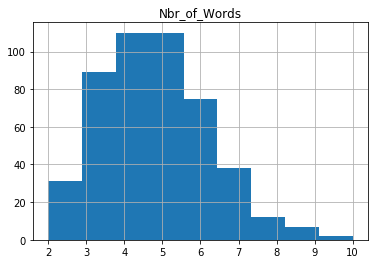

In [15]:
count_words_in_title = np.sum(titles_words_exist.toarray(), axis=1)
    # sum by row - words per title

count_words_df = pd.DataFrame(count_words_in_title.tolist(), columns=['Nbr_of_Words'])

# summary statistics
print(count_words_df.describe())

# histogram
count_words_df.hist(bins=9)

### Variation 1-A - Default - Feature Frequency
#### Are words duplicated within an article title (document)? 
I would guess very few, given the short article titles (3-6 words)

**Results:** NO!  'to' (a stop word) is the only word that appears in a title more than once.

So going forward, I will continue with just looking at feature exists in document (`binary=True`) rather calculate the actual frequency that a feature occurs within a document (`binary=False`).

In [16]:
# create/apply vectorizer to return counts of words, rather than 0/1 for exist of word.
cv_nbr_words = CountVectorizer(binary=False)  

titles_nbr_words = cv_nbr_words.fit_transform(titles_df['Title'])


# typical bag of words DataFrame
# - rows    - document
# - columns - the words/features across the corpus
# - cell    - count of occurrence of word in document
nbr_words_df = pd.DataFrame(titles_nbr_words.toarray(), columns=cv_nbr_words.get_feature_names())

# find max number of occurrences of each word
max_occurrence = nbr_words_df.max()
max_occurrence[max_occurrence > 1]

to    2
dtype: int64

## Variation 2 - Preserve Original Case

The text (article title) is 'title cased' where most words are capitalized, except stop words.  **I suspect** keeping the original case will not dramatically increase the number of features.  Plus, some of the additional features will likely be eliminated as stop words.

**Results:**  Preserving the original case (i.e., do not convert to lower case) is helpful.

In [17]:
cv_mixed_case = CountVectorizer(binary=True, lowercase=False) 
titles_mixed_case = cv_mixed_case.fit_transform(titles_df['Title'])

print("Features Detected: ", titles_mixed_case.shape[1])

# 1098 case sensitive features vs. 1085 lower case features
# difference of (13 words)

Features Detected:  1098


In [18]:
# explore list
features_names = cv_mixed_case.get_feature_names()

features_names[1075:]  # bottom of list - most likely the lower case variants

# features_names[:550]   # top    half of list
# features_names[550:]   # bottom half of list

['Worker',
 'Workers',
 'Workforce',
 'Worry',
 'Wrestles',
 'Your',
 'Zappos',
 'Zone',
 'ai',
 'an',
 'and',
 'as',
 'at',
 'by',
 'for',
 'in',
 'into',
 'of',
 'on',
 'or',
 'the',
 'to',
 'with']

### Thoughts on Results

Preserving the original case in the article titles generated 1098 features (or 13 additional). Converting text to all lower case created 1085 features.

The additional features (all lower cases vs. first letter capitalized) should be at the bottom of the list.  Other than 'ai' they do look like stop words.

## Variation 3 - Adjust RegEx to Preserve Hyphenated Words
The default regular expression for a token splits hyphenated words at the hyphen.  About 10% of the titles contain a hyphenated word.  I believe it is more meaningful to keep the hyphenated word as a feature (single word) than separate into the individual components.  Example of hyphenated words: High-Tech, Self-Sufficiency, Co-Founder, White-Collar, Open-Source.

In [22]:
# I found tips on adjusting the regex of the token from ...
# https://stackoverflow.com/questions/38115367/scikit-learn-dont-separate-hyphenated-words-while-tokenization

# default token pattern is (?u)\b\w\w+\b
    # note:  \w = [a-zA-Z0-9_]

# my_token_pattern = "(?u)\\b\\w\\w+\\b"          # default
# my_token_pattern = "(?u)\\b\\w[\\w\\-]+\\b"     # keep hyphen
my_token_pattern = "(?u)\\b\\w[\\w\\-.]+\\b"    # keep hyphen & period (for abbreviations)

    # hmmm, it does not capture the ending period (e.g., U.S vs U.S. or Sen vs. Sen.)

cv3 = CountVectorizer(binary=True, lowercase=False, token_pattern=my_token_pattern) 

features_cv3 = cv3.fit_transform(titles_df['Title'])

print("Features Detected: ", features_cv3.shape[1])
print("\n")

#1098 # default - at least 2 char word "(?u)\\b\\w\\w+\\b"
#1104 # include hyphen w/in words      "(?u)\\b\\w[\\w\\-]+\\b"
#1107 # also include period w/in words "(?u)\\b\\w[\\w\\-.]+\\b"
    # like u.k, u.s, s.f

# explore list
features_names = cv3.get_feature_names()

# features_names[:550]   # top    half of list
# features_names[550:]   # bottom half of list

print(features_names[:250])

Features Detected:  1107


['100', '11.5', '16', '2022', '248', '40', '50', 'AB', 'AI', 'AI-Based', 'AI-Driven', 'AI-Powered', 'AT', 'AWS', 'Abandon', 'Abroad', 'Absolut', 'Abuse', 'Academic', 'Academics', 'Acceptance', 'Accidents', 'Account', 'Accountants', 'Acquisition', 'Acquisitions', 'Across', 'Add', 'Adding', 'Address', 'Addressing', 'Adoption', 'Adopts', 'Ads', 'Advance', 'Adversarial', 'Advise', 'Against', 'Agency', 'Ahead', 'Aim', 'Aims', 'Airbus', 'Airline', 'Airport', 'Alexa', 'Algo', 'Algo-Powered', 'Algorithm', 'Algorithms', 'Algos', 'Alien', 'All', 'AlphaSense', 'Amazon', 'Among', 'Analysis', 'Analytics', 'Andrew', 'Angle', 'Angles', 'Animal-Recognition', 'Anthem', 'Antibias', 'Antitrust', 'Anxiety', 'App', 'Apple', 'Apple-Picking', 'Applicants', 'Appoints', 'Appraisals', 'Approach', 'Approve', 'Architecture', 'Are', 'ArgoAI', 'Arise', 'Arms', 'Assault', 'Assessing', 'Asset', 'Assistant', 'Assistants', 'At', 'Athletic', 'Attacks', 'Auditing', 'Augments', 'Autism', 'Auto',

### Thoughts on Results

The hyphenated words are less common (i.e., do not appear in many article titles).  But the hyphenated words are more meaningful features and I did not bloat my list of features.  I only added 5 total features by including the hyphen.  I suspect I am adding a hyphenated word but elminating or replacing one of the component pieces as a separate features.  For example, Ex-Google or Co-Founder I am probably eliminating Ex and Co as (useless) words/features.

I also tried to capture abbreviations by including periods in my token. For example U.S., U.K. or S.F. were not originally included as a feature because the regex did not include periods.  These were broken into a token for each chunk between the periods and then excluded as single char tokens.  I don't quite have the right regex.  I'm not capturing the ending period.  But I'll leave that as a task for another time.

The code below show the features my custom regex eliminated and the new features it was able to capture.

**Perserving hyphenated words (and abbreviations, too) is helpful!**

In [24]:
# -------------------------------------------------------------------------
# look at differences in features
# -------------------------------------------------------------------------

features_names_v2 = cv_mixed_case.get_feature_names()
features_names_v3 = cv3.get_feature_names()

# features removed/lost (in v2, but not v3)
features_del = set(features_names_v2) - set(features_names_v3)
print("{} Features Elminated".format(len(features_del)))
print(features_del)

# features added (in v3, but not v2)
features_add = set(features_names_v3) - set(features_names_v2)
print("\n{} Features Added".format(len(features_add)))
print(features_add)

39 Features Elminated
{'Fact', 'Hyper', 'Powered', 'Laundry', 'Driving', 'By', 'ai', 'Sector', 'Checking', 'Diagnosis', '11', 'Sufficiency', 'Image', 'Personalization', 'Senior', 'Crunching', 'Picking', 'Site', 'Space', 'Folding', 'Self', 'Labeling', 'Level', 'Sources', 'Source', 'Based', 'Pony', 'Cutting', 'Ex', 'Size', 'Co', 'Cancer', 'Paige', 'Like', 'Circuit', 'Animal', 'Collar', 'Driven', 'Gen'}

48 Features Added
{'White-Collar', 'Next-Gen', 'Self-Driving', 'Algo-Powered', 'Data-Labeling', 'Customer-Service', 'Facial-Recognition', 'Cost-Cutting', 'Job-Site', 'Human-Like', 'Co-Founder', 'Fire-Fighting', 'S.F', 'In-Sources', 'Human-Machine', 'Circuit-Board-Size', 'Data-Crunching', 'Death-Predicting', 'Fact-Checking', 'Office-Space', 'Manufacturing-Sector', 'Laundry-Folding', 'Paige.AI', 'AI-Driven', 'Open-Source', 'U.S', 'Next-Level', 'Cancer-Diagnosis', 'Senior-Housing', 'Image-Recognition', 'Pony.ai', 'AI-Based', '11.5', 'Facial-Image', 'Apple-Picking', 'Hyper-Personalization', '

## Variation 4 - Exclude Stop Words

Now exclude stop words, on top of Variation 3 settings (preserves original case, custom regex to include hyphens and periods).

I needed to create a custom list of stop words.  The default stop word list only contained lower case words.  I preserved the case of the token and sometimes stop words are actually capitalized in the article title.

**Result:** Eliminated 72 features (6%) using terms on the default stop list.  Now I'm at 1035 features.
There are a few features excluded that are a little questionable (Bill, Call, Fire).  More research is needed to decide if I should make some additional adjustments to the my custom list of stop words (add or remove words).

In [25]:
# start with default stop words and include as all lower case and first letter capitalized

from sklearn.feature_extraction import stop_words

my_stop_words = set()
for stopword in stop_words.ENGLISH_STOP_WORDS:
    my_stop_words.add(stopword)
    my_stop_words.add(stopword.capitalize())

# print(len(my_stop_words))
# 318 - double = 636
# my_stop_words

In [26]:
my_token_pattern = "(?u)\\b\\w[\\w\\-.]+\\b"    # keep hyphen & period (for abbreviations)

cv4 = CountVectorizer(binary=True, lowercase=False,
                      token_pattern=my_token_pattern, 
                      stop_words=my_stop_words) 

features_cv4 = cv4.fit_transform(titles_df['Title'])

print("Features Detected: ", features_cv4.shape[1])

#1098 # default - at least 2 char word "(?u)\\b\\w\\w+\\b"
#1107 # regex to include hyphen & period w/in words "(?u)\\b\\w[\\w\\-.]+\\b"
#1093 # exclude stop words (default 'english' - all lower case)
#1035 # exclude stop words (custom  lower case & capitalized version)

# explore list
features_names = cv4.get_feature_names()

#features_names[:550]   # top    half of list
#features_names[550:]   # bottom half of list


# Look at words excluded (difference in features between Variation 3 and 4)
# Do they appear to be stop words that make sense to eliminated?
print("\nWords Excluded (e.g., a stop word)\n")
features_names_cv3 = cv3.get_feature_names()
print(set(features_names_cv3) - set(features_names))

Features Detected:  1035

Words Excluded (e.g., a stop word)

{'In', 'Too', 'Call', 'Your', 'Behind', 'More', 'Interest', 'Out', 'Its', 'Next', 'That', 'It', 'Still', 'On', 'to', 'With', 'Against', 'Among', 'Back', 'When', 'of', 'May', 'Up', 'with', 'Where', 'From', 'and', 'All', 'for', 'How', 'at', 'Are', 'Why', 'Could', 'as', 'Can', 'Than', 'Be', 'Bill', 'Off', 'Across', 'We', 'The', 'Side', 'an', 'At', 'For', 'on', 'Should', 'Might', 'in', 'into', 'Through', 'Is', 'Will', 'the', 'Get', 'Serious', 'Go', 'Fire', 'Over', 'Find', 'Less', 'or', 'by', 'Everywhere', 'Keep', 'What', 'Who', 'Into', 'See', 'Themselves'}


### Variation 4 Top Features (Most Frequent Across Documents)

In [27]:
sorted_count_df = get_sorted_features(features_cv4.toarray(), cv4.get_feature_names())
sorted_count_df.head(15)

,Documents
AI,172
Tech,15
Google,14
Robots,14
Facial,14
Recognition,14
Ethics,13
New,13
Data,12
Robot,11


## Variation 5 - Prevalent Terms

Building on Variation 4, expand to also include 2 word features and limit features to those in a minimum threshold of documents (1%).

In [28]:
my_token_pattern = "(?u)\\b\\w[\\w\\-.]+\\b"    # keep hyphen & period (for abbreviations)

cv5 = CountVectorizer(binary=True, lowercase=False,
                      token_pattern=my_token_pattern, 
                      stop_words=my_stop_words,
                      min_df=0.01,
                      ngram_range=(1,2)
                     ) 

features_cv5 = cv5.fit_transform(titles_df['Title'])

print("Features Detected: ", features_cv5.shape[1])

features_names = cv5.get_feature_names()

print('\n', features_names)

Features Detected:  42

 ['AI', 'Amazon', 'Automation', 'Bias', 'Big', 'Business', 'Change', 'China', 'Data', 'Driverless', 'Ethics', 'Facial', 'Facial Recognition', 'Firms', 'Google', 'Health', 'Helping', 'Human', 'IBM', 'Investment', 'Learning', 'Looks', 'Machine', 'Make', 'Making', 'Microsoft', 'Million', 'New', 'Push', 'Raises', 'Recognition', 'Robot', 'Robots', 'Seen', 'Startup', 'Tech', 'Tools', 'U.S', 'Use', 'Uses', 'Using', 'Using AI']


### Variation 5 Top Features

In [29]:
sorted_count_df = get_sorted_features(features_cv5.toarray(), cv5.get_feature_names())
sorted_count_df

,Documents
AI,172
Tech,15
Facial,14
Recognition,14
Google,14
Robots,14
Facial Recognition,14
Ethics,13
New,13
Data,12


# Now Finally!! Research Feature & Associated Article Title(s)

Finally, take some features and look up the related article(s).

A lot of the terms make sense.
- Companies: Google, Amazon, IBM, Microsoft
- Topics: Facial Recognition, Robot/Robots, Ethics, Bias

Some seem more like stop words that do not add much to the understanding of the prevelant article topics.
- New, Use/Using/Uses, Push, Seen

## Examples of Appropriate/Expected Features

In [30]:
# Health
search_titles('Health')[['Title', 'Date', 'Link']]

,Title,Date,Link
1,Linking EKG Data to Health Status,"Wednesday, August 28th",http://createsend.com/t/d-A427D2A4C0EFD1F82540EF23F30FEDED
22,"Health Care, Sales Software Draw VC Funding","Tuesday, July 30th",http://createsend.com/t/d-A1BD7A3CB179A11F2540EF23F30FEDED
104,Health Agency Launches AI Challenge,"Monday, April 1st",http://createsend.com/t/d-966FFE7CC9E33FD92540EF23F30FEDED
126,Health Providers Develop AI Pathology Tools,"Thursday, February 28th",http://createsend.com/t/d-CB60BD202A582E9F2540EF23F30FEDED
127,Safeway Expands AI Health Clinics,"Wednesday, February 27th",http://createsend.com/t/d-F7543AEA82C99F6D2540EF23F30FEDED
224,Using AI and Wearables to Improve Health Care,"Wednesday, May 29th",http://createsend.com/t/d-4A588D110F7B4D602540EF23F30FEDED
391,Protecting Data in AI Health Systems,"Wednesday, May 15th",http://createsend.com/t/d-4BDE76DC305BEB902540EF23F30FEDED
440,Improving Health Care,"Tuesday, March 5th",http://createsend.com/t/d-69D3E347E03D85602540EF23F30FEDED
466,Health and Human Services Boosts Investment,"Thursday, January 24th",http://createsend.com/t/d-EBF606F5AAA3AFAA2540EF23F30FEDED


In [31]:
# Learning
search_titles('Learning')[['Title', 'Date', 'Link']]

,Title,Date,Link
136,Hackers Manipulate Machine Learning Data,"Wednesday, February 13th",http://createsend.com/t/d-24F057A8365A95DB2540EF23F30FEDED
183,Twitter's Machine Learning,"Monday, July 29th",http://createsend.com/t/d-D38F662D4FCCDFD12540EF23F30FEDED
314,Learning More With Less Data,"Wednesday, January 16th",http://createsend.com/t/d-C76FFC4D1B068C022540EF23F30FEDED
322,Naspers Eyes Machine Learning,"Monday, August 26th",http://createsend.com/t/d-5CCCECDBA202FB562540EF23F30FEDED
392,Using Machine Learning to Boost Sales,"Tuesday, May 14th",http://createsend.com/t/d-A817E226655F4F7A2540EF23F30FEDED
438,Google Tightens Machine-Learning Data Security,"Thursday, March 7th",http://createsend.com/t/d-137AB5D233E983B42540EF23F30FEDED
449,Deep Learning Could Change How We Invent,"Wednesday, February 20th",http://createsend.com/t/d-FA66E99EAF9571BE2540EF23F30FEDED


## Examples of Odd/Less Useful Features
Likely candidates of additional stop words

In [32]:
# Uses
search_titles('Uses')[['Title', 'Date', 'Link']]

,Title,Date,Link
12,Security Firm Uses AI to Deploy Resources,"Tuesday, August 13th",http://createsend.com/t/d-2EE1F12EA5669D802540EF23F30FEDED
58,NHL Uses Chatbot to Interact With Fans,"Thursday, June 6th",http://createsend.com/t/d-588B2BD3B5B7DBD22540EF23F30FEDED
197,ICE Uses Facial Recognition on Driver's Photos,"Tuesday, July 9th",http://createsend.com/t/d-53625F05CAA128452540EF23F30FEDED
246,Walmart Uses AI to Monitor Store,"Friday, April 26th",http://createsend.com/t/d-4E296F56B9D9ACFA2540EF23F30FEDED
350,Unilever Uses AI to Cut Costs,"Tuesday, July 16th",http://createsend.com/t/d-F19F782D41E4F2FF2540EF23F30FEDED
376,Amazon Uses AI Across Its Business,"Thursday, June 6th",http://createsend.com/t/d-588B2BD3B5B7DBD22540EF23F30FEDED


In [33]:
# Push
search_titles('Push')[['Title', 'Date', 'Link']]

,Title,Date,Link
76,Push for AI Self-Sufficiency,"Friday, May 10th",http://createsend.com/t/d-7EAB3F0986D964CA2540EF23F30FEDED
219,Automation May Push Women From Workforce,"Wednesday, June 5th",http://createsend.com/t/d-01D69E144C2200182540EF23F30FEDED
265,Google's New Robot Push,"Thursday, March 28th",http://createsend.com/t/d-723D32C4C8C196D22540EF23F30FEDED
272,Stanford's Benevolent Machine Push,"Tuesday, March 19th",http://createsend.com/t/d-E3AF4DB6ADB01D072540EF23F30FEDED
320,Synchrony's AI Push,"Wednesday, August 28th",http://createsend.com/t/d-A427D2A4C0EFD1F82540EF23F30FEDED
397,Google's Latest Push,"Tuesday, May 7th",http://createsend.com/t/d-229DE7069CD2AEEE2540EF23F30FEDED
433,China's Research Push,"Thursday, March 14th",http://createsend.com/t/d-37AC3C321823439D2540EF23F30FEDED
446,Amazon's Autonomous Vehicle Push,"Monday, February 25th",http://createsend.com/t/d-BB039B06392DA5272540EF23F30FEDED
